### В данном уроке мы выделим еще несколько потенциально важных фичей из изначального датасета и попробуем применить изученные методы отбора признаков к итоговому датасету.

In [1]:
import numpy as np
import pandas as pd

processed_data = pd.read_csv('processed_data.csv', index_col='id')

processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration
id,,,,,
id2875421,1,930.399753,0,1.500479,6.122493
id2377394,0,930.399753,0,1.807119,6.498282
id3858529,1,930.399753,0,6.392080,7.661527
id3504673,1,930.399753,0,1.487155,6.063785
id2181028,1,930.399753,0,1.189925,6.077642


In [2]:
initial_data = pd.read_csv('taxi_dataset.csv')

initial_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N


In [3]:
initial_data.shape[0] == processed_data.shape[0]

True

In [4]:
### Вернем в датасет колонку pickup_datetime

initial_data = initial_data.set_index('id')

processed_data = pd.merge(processed_data, initial_data['pickup_datetime'],
                          left_index=True, right_index=True)

In [5]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime
id,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55


Напомним, **pickup_datetime** - время начала поездки.

Кажется, что в зависимости от месяца/дня недели/времени суток движение на дорогах может отличаться. Как из-за погодных условий, так и из-за загруженности транспорта. Поэтому, есть подозрение, что будет полезно выделить ряд признаков из колонки **pickup_datetime**. Давайте исследуем зависимость нашей таргетной переменной от указанных факторов.

In [6]:
processed_data['pickup_datetime'] = pd.to_datetime(processed_data['pickup_datetime'])

processed_data['date'] = processed_data.pickup_datetime.dt.date
processed_data['day_of_week'] = processed_data.pickup_datetime.dt.dayofweek
processed_data['hour'] = processed_data.pickup_datetime.dt.hour
processed_data['month'] = processed_data.pickup_datetime.dt.month

In [7]:
processed_data.head()


,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


Исследуем, когда и сколько поездок было совершено. 

Начнем с графиков, показывающих количество поездок в зависимости от времени суток/даты и т.д.

Так же полезно сразу показать и среднее значение таргетной переменной.

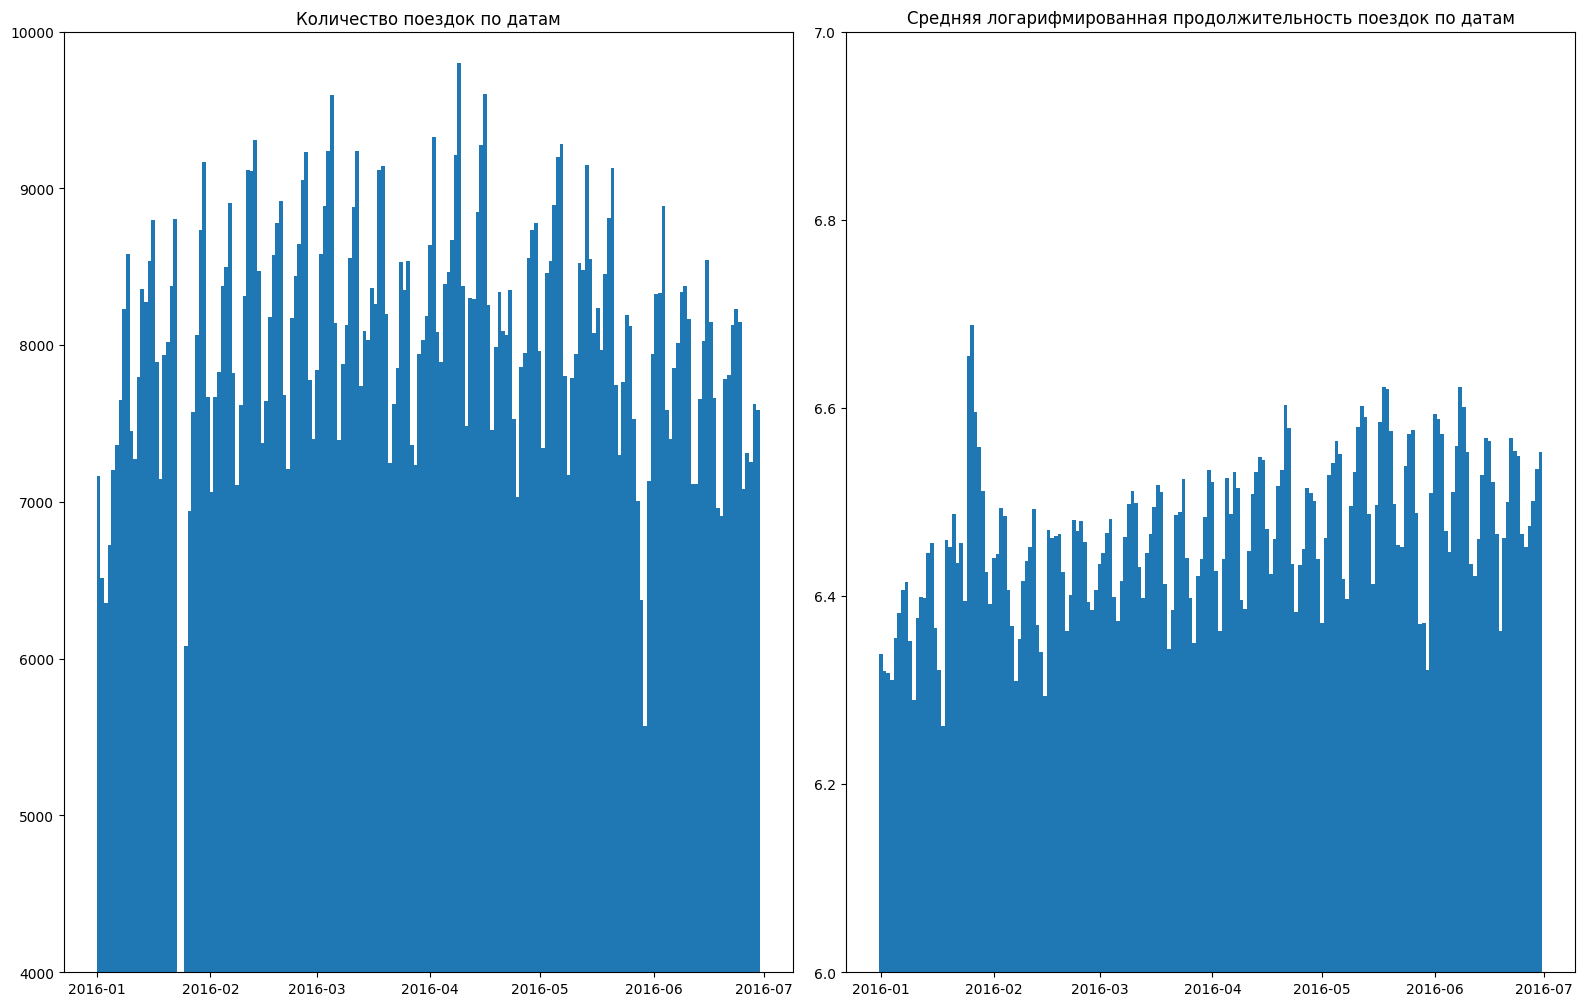

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['date'], bins=processed_data.date.unique().shape[0])
plt.ylim((4000, 10000))

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['date'].unique())), 
        processed_data.groupby('date', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

Кажется, что внутри недели есть некоторая зависимость таргета от дня недели. 

Такая же зависимость может оказаться и внутри дня (в завимости от часов).

Предлагаю исследовать эту зависимость подробнее.

Изобразите следующие графики зависимостей:

- Количество поездок/Средняя продолжительность поездки vs День недели
- Количество поездок/Средняя продолжительность поездки vs время суток
- Средняя продолжительность поездки vs время суток для каждого дня недели (например, нарисовав с разными цветами и, соответственно, легендами)
- Аналогичные графики, используя информацию о месяце, внутри которого была совершена поездка.
- Ящики с усами для различных: времени суток, дня недели, месяца

Используйте любые доступные инструменты pyplot!

Далее, на основе полученных результатов, мы будем принимать решение о создании новых признаков.

EDA можно использовать не только для того, чтобы понять, какие фичи можно убрать из датасета. Но и для выделения базовых признаков. Этим и займемся!

P.S. Сами графики мы проверять у Вас не будем. Зато для ответа на устные вопросы понадобятся, поэтому, в любом случае, крайне рекомендуем поупражняться. Поэтому рисовать все графики не обязательно - ограничьтесь теми, которые помогут Вам ответить на тестовые вопросы.

**Hint**: обратите внимание на сильную просадку в январе. Почему она могла произойти - можно прочитать <a href="https://en.wikipedia.org/wiki/January_2016_United_States_blizzard"> здесь</a>. В будущем можно будет создать бинарный признак "произошла ли поездка во время сильного снегопада".


In [10]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


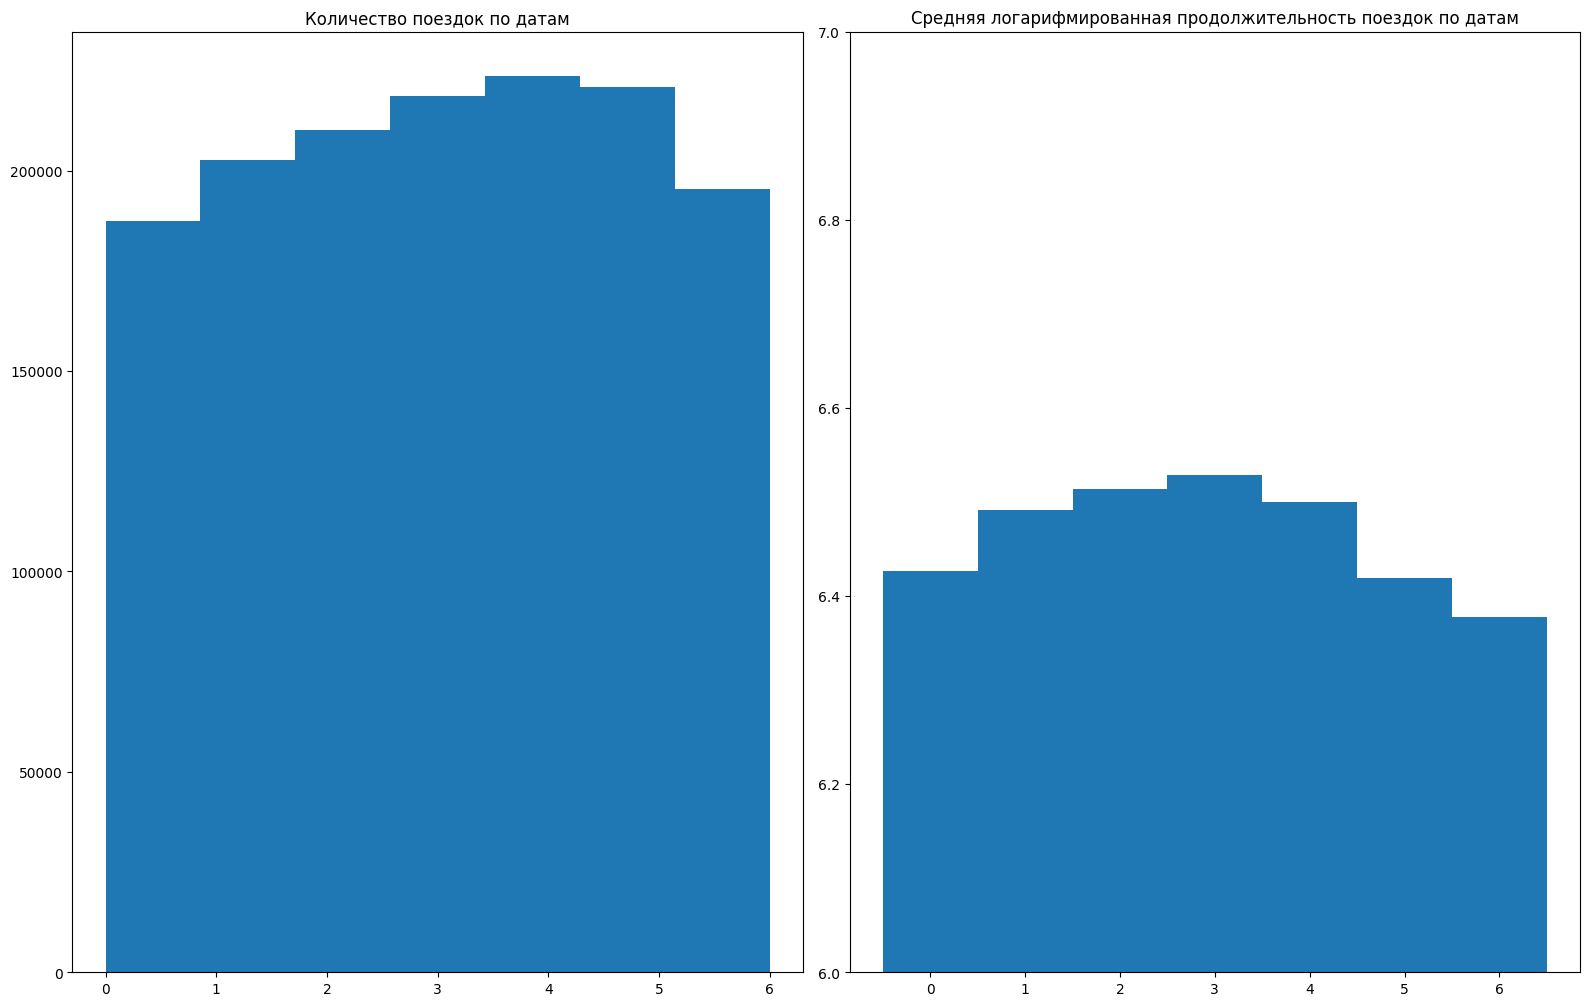

In [32]:
### Your code is here
#количество поездок, средняя продолжительность vs день недели
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['day_of_week'], bins=processed_data.day_of_week.unique().shape[0])

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['day_of_week'].unique())), 
        processed_data.groupby('day_of_week', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по датам')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по датам')

plt.show()

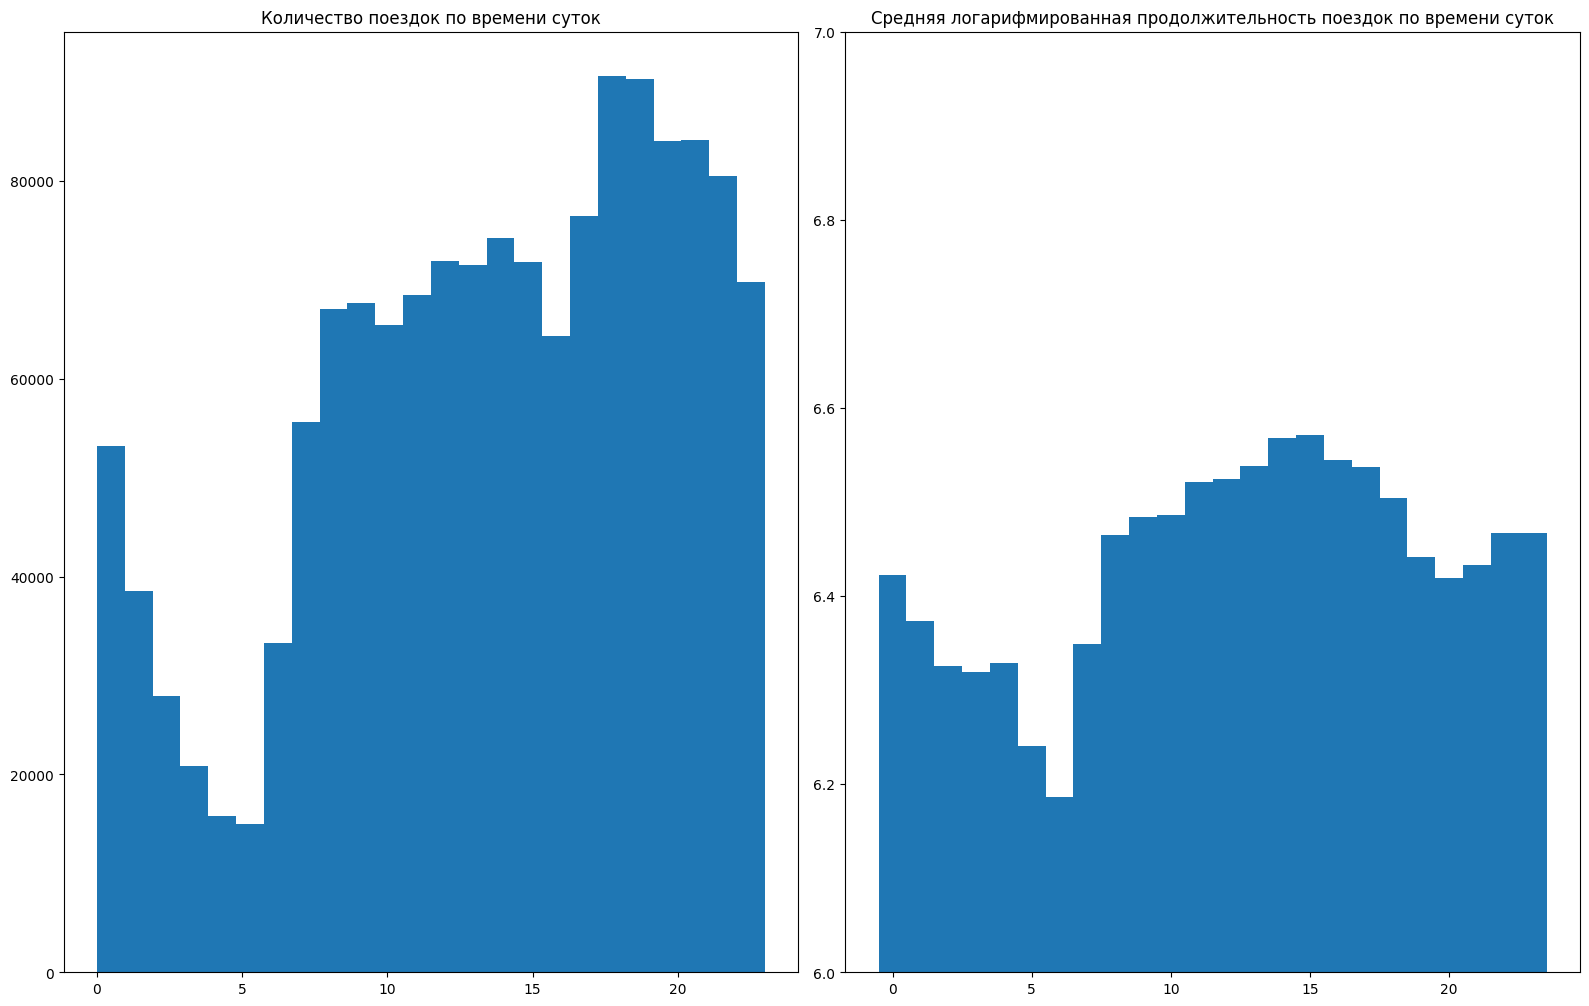

In [33]:
### Your code is here
#количество поездок, средняя продолжительность vs время суток
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['hour'], bins=processed_data.hour.unique().shape[0])

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['hour'].unique())), 
        processed_data.groupby('hour', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)
plt.ylim((6, 7))

fig.tight_layout()

ax_1.set(title = 'Количество поездок по времени суток')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по времени суток')

plt.show()

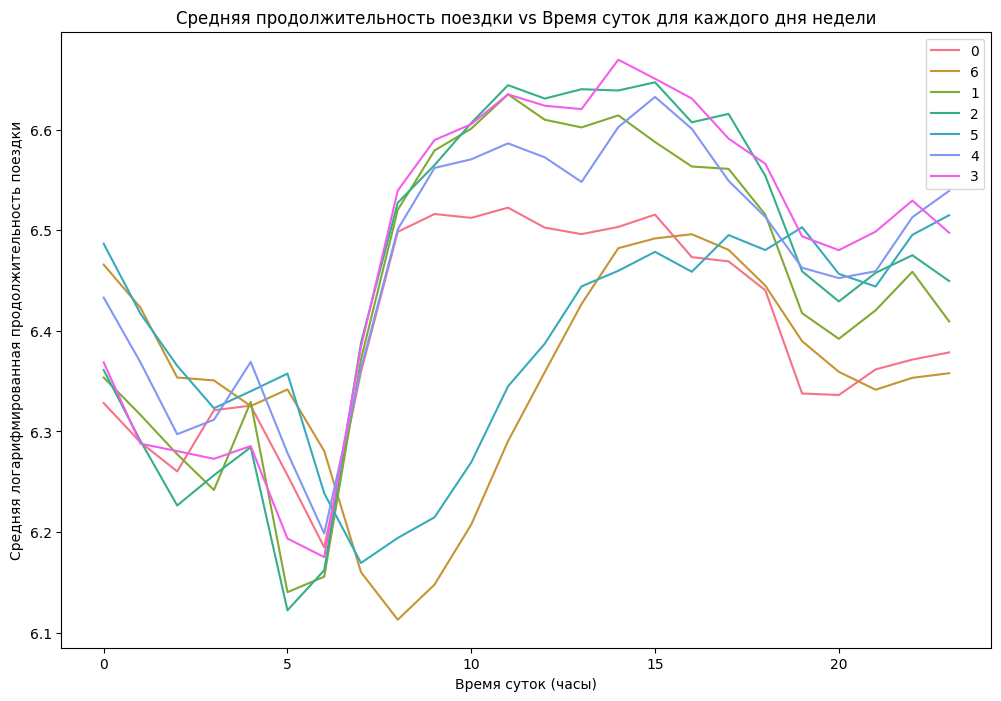

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns  # Дополнительная библиотека для красивого оформления графиков

fig, ax = plt.subplots(figsize=(12, 8))

# Создаем цветовую палитру для каждого дня недели
colors = sns.color_palette("husl", n_colors=len(processed_data['day_of_week'].unique()))

# Строим график для каждого дня недели
for day, color in zip(processed_data['day_of_week'].unique(), colors):
    subset = processed_data[processed_data['day_of_week'] == day]
    average_duration = subset.groupby('hour')['log_trip_duration'].mean()
    ax.plot(average_duration.index, average_duration, label=day, color=color)

# Добавляем легенду
ax.legend()

# Добавляем метки осей и заголовок
ax.set_xlabel('Время суток (часы)')
ax.set_ylabel('Средняя логарифмированная продолжительность поездки')
ax.set_title('Средняя продолжительность поездки vs Время суток для каждого дня недели')

plt.show()


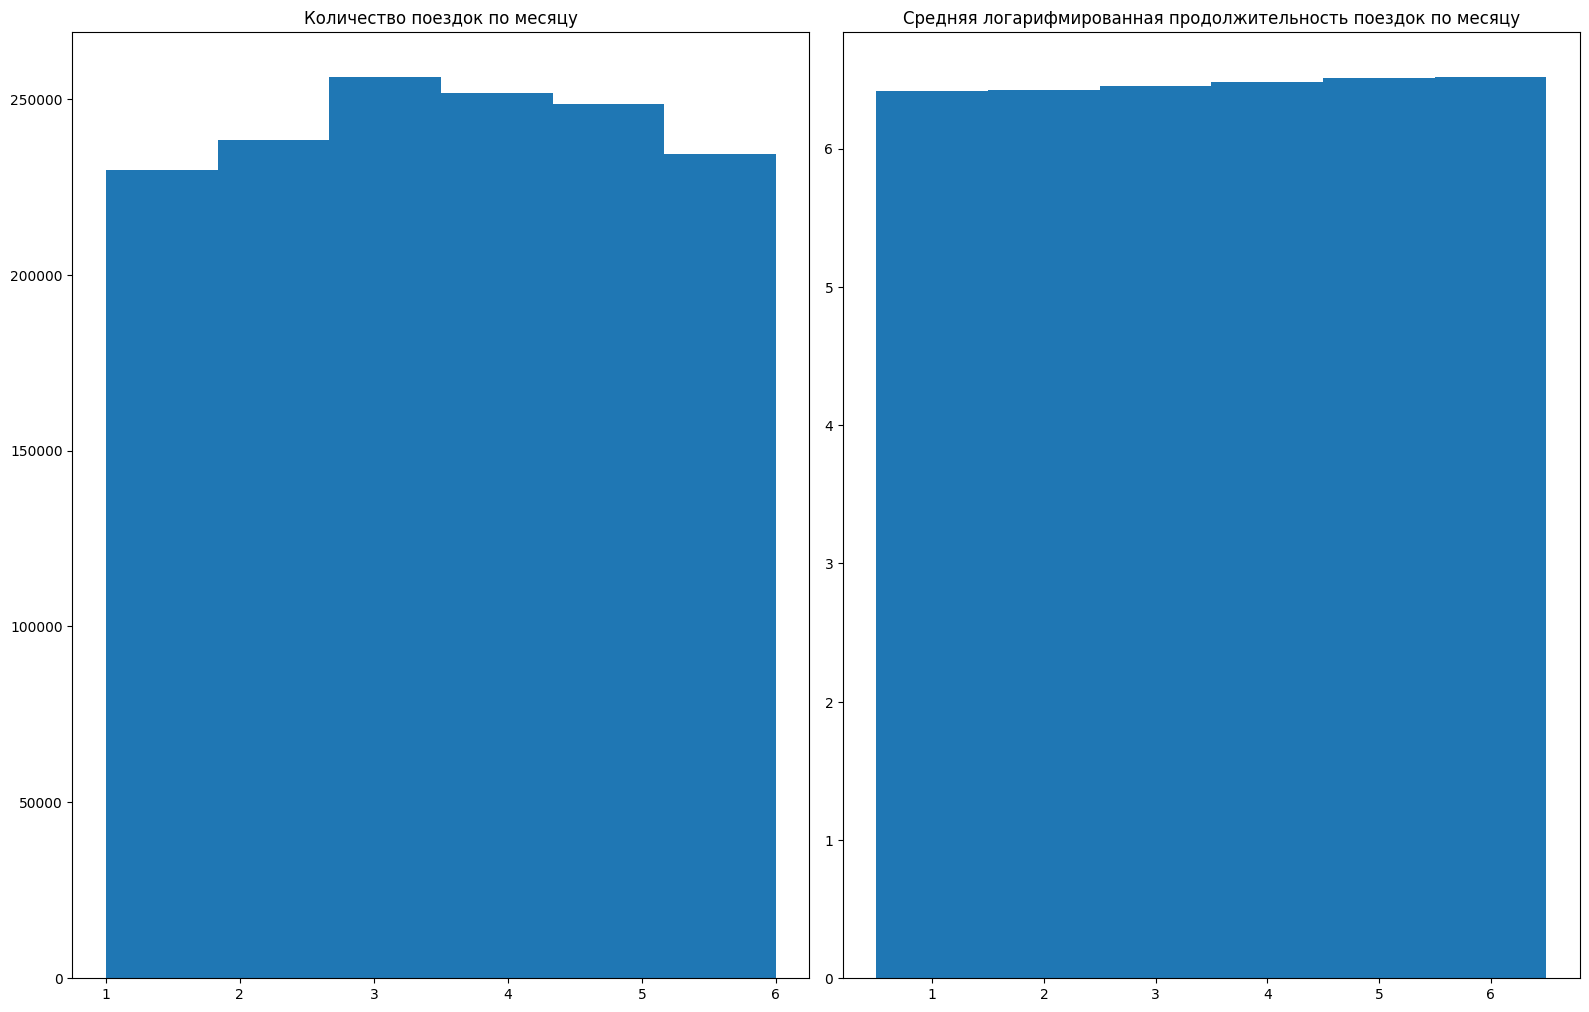

In [35]:
### Your code is here
#количество поездок, средняя продолжительность vs месяц
import matplotlib.pyplot as plt

fig = plt.figure()

fig.set_size_inches(16, 10)

ax_1 = fig.add_subplot(1, 2, 1)
plt.hist(processed_data['month'], bins=processed_data.month.unique().shape[0])

ax_2 = fig.add_subplot(1, 2, 2)
plt.bar(sorted(list(processed_data['month'].unique())), 
        processed_data.groupby('month', as_index=False)['log_trip_duration'].mean()['log_trip_duration'],
        width=1)

fig.tight_layout()

ax_1.set(title = 'Количество поездок по месяцу')
ax_2.set(title = 'Средняя логарифмированная продолжительность поездок по месяцу')

plt.show()

[3 6 1 4 5 2]


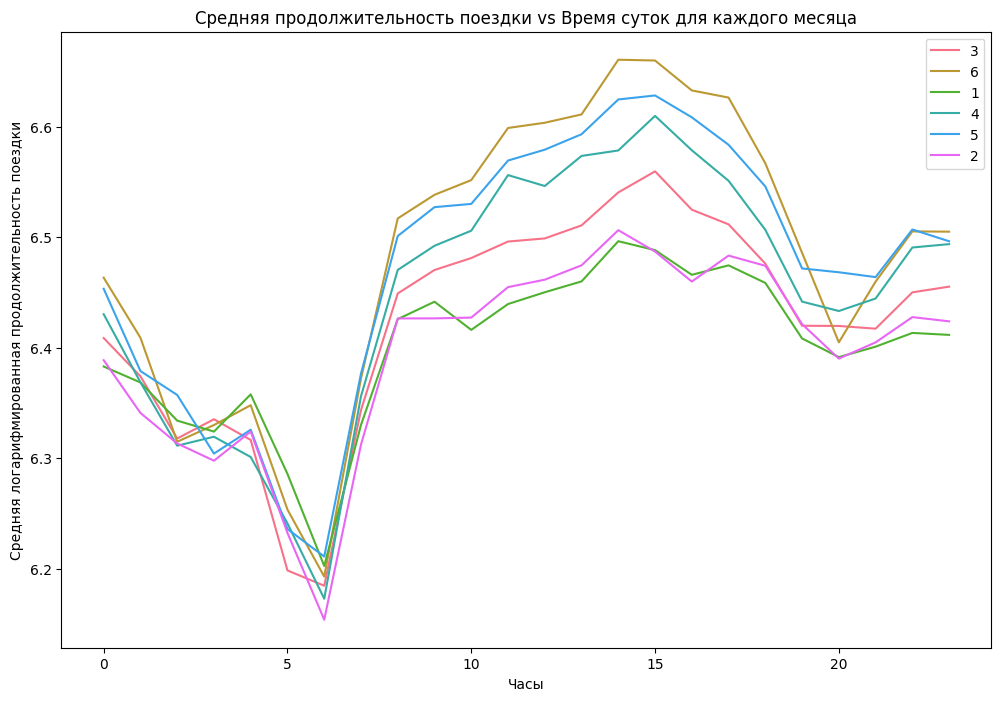

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(12, 8))

# Создаем цветовую палитру для каждого месяца
colors = sns.color_palette("husl", n_colors=len(processed_data['month'].unique()))

print(processed_data['month'].unique())
# Строим график для каждого месяца
for month, color in zip(processed_data['month'].unique(), colors):
    subset = processed_data[processed_data['month'] == month]
    average_duration = subset.groupby('hour')['log_trip_duration'].mean()
    ax.plot(average_duration.index, average_duration, label=str(month), color=color)  # обновлено имя переменной

# Добавляем легенду
ax.legend()

# Добавляем метки осей и заголовок
ax.set_xlabel('Часы')
ax.set_ylabel('Средняя логарифмированная продолжительность поездки')
ax.set_title('Средняя продолжительность поездки vs Время суток для каждого месяца')

plt.show()


Кажется, что полученные выводы из графиков выше достаточны для того, чтобы посчитать признаки, связанные с временем/датой поездки, достаточно важными. На их основе выделим еще пару.

Добавьте следующие бинарные признаки:


1. Была ли в день поездки буря (основываясь на единственном обнаруженном таком дне)
2. Является ли время поездки статистически самым проблемным, то есть час пиком?

Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

P.S. назовите колонки **anomaly** и **traffic_jam**

In [50]:
processed_data.head(15)

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3
id0801584,1,1061.355223,0,1.100107,6.095825,2016-01-30 22:01:40,2016-01-30,5,22,1
id1813257,0,1053.529749,0,1.327852,5.834811,2016-06-17 22:34:59,2016-06-17,4,22,6
id1324603,1,930.399753,0,5.722427,7.347300,2016-05-21 07:54:58,2016-05-21,5,7,5
id1301050,0,930.399753,0,1.311541,5.545177,2016-05-27 23:12:23,2016-05-27,4,23,5


In [54]:
count_by_date = processed_data.groupby('date')['log_trip_duration'].count()
sorted_count_by_date = count_by_date.sort_values(ascending=True)
limit_number = sorted_count_by_date[0]
print(limit_number)

1648


C:\Temp\ipykernel_22916\1606252572.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  limit_number = sorted_count_by_date[0]


In [57]:
### Создадим первый бинарный признак
### Your code is here

processed_data['anomaly'] = (processed_data.groupby('date')['log_trip_duration'].transform('count') < limit_number).astype(int)


In [58]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly
id,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0


Является ли время поездки статистически самым проблемным, то есть час пиком?
Для создания 2ой фичи используйте следующую логику: посчитаем для каждой пары "день недели"-"время суток" среднее значение таргета. Найдем топ-10 самых "больших" пар. Если поездка была совершена во входящее в этот топ время, то ставим 1. Иначе - 0. Получается бинарный признак.

In [70]:
### Создадим второй бинарный признак
### Your code is here
mean_of_2 = processed_data.groupby(['day_of_week', 'hour'])['log_trip_duration'].mean()
top_10_pairs = mean_of_2.nlargest(10)
print(top_10_pairs)
processed_data['traffic_jam'] = processed_data.apply(lambda row: 1 if (row['day_of_week'], row['hour']) in top_10_pairs.index else 0, axis=1)

day_of_week  hour
3            14      6.669526
             15      6.650622
2            15      6.647091
             11      6.644226
             13      6.640205
             14      6.638930
1            11      6.635141
3            11      6.635055
4            15      6.632537
3            16      6.630965
Name: log_trip_duration, dtype: float64


In [75]:
mean_of_2.head(25)

day_of_week  hour
0            0       6.328173
             1       6.289221
             2       6.260257
             3       6.321038
             4       6.325626
             5       6.256471
             6       6.184772
             7       6.359147
             8       6.498381
             9       6.516128
             10      6.512313
             11      6.522476
             12      6.502599
             13      6.496144
             14      6.503294
             15      6.515543
             16      6.473270
             17      6.469051
             18      6.440283
             19      6.337701
             20      6.336174
             21      6.361631
             22      6.371409
             23      6.378529
1            0       6.353598
Name: log_trip_duration, dtype: float64

In [71]:
processed_data.head()

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,pickup_datetime,date,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,2016-03-14 17:24:55,2016-03-14,0,17,3,0,0
id2377394,0,930.399753,0,1.807119,6.498282,2016-06-12 00:43:35,2016-06-12,6,0,6,0,0
id3858529,1,930.399753,0,6.392080,7.661527,2016-01-19 11:35:24,2016-01-19,1,11,1,0,1
id3504673,1,930.399753,0,1.487155,6.063785,2016-04-06 19:32:31,2016-04-06,2,19,4,0,0
id2181028,1,930.399753,0,1.189925,6.077642,2016-03-26 13:30:55,2016-03-26,5,13,3,0,0


Теперь колонки **pickup_datetime**, **date** можно убрать. А про оставшиеся **day_of_week**, **hour**, **month** необходимо подумать:

- С одной стороны, первые две можно убрать, так как на их основе была создана колонка **traffic_jam**
- С другой стороны, зависимость с колонкой **traffic_jam** нелинейная, поэтому можно попробовать использовать все фичи в комбинации. Конечно, лучше попробовать оба варианта и проэкспериментировать, но ради упрощения - оставим все колонки. Хоть **day_of_week**, **hour** и описываются числами, мы понимаем, что это скорее категориальные фичи. Потому что, например, отношение между 23:00 и 00:00 не такое же, как между числами 23 и 0. Закодируем их с помощью OneHotEncoder. 
- Последняя (**month**) очевидно категориальная. Можно закодировать ее тоже через OneHotEncoder.

In [72]:
processed_data = processed_data.drop(['pickup_datetime', 'date'], axis=1)

In [76]:
processed_data

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,day_of_week,hour,month,anomaly,traffic_jam
id,,,,,,,,,,
id2875421,1,930.399753,0,1.500479,6.122493,0,17,3,0,0
id2377394,0,930.399753,0,1.807119,6.498282,6,0,6,0,0
id3858529,1,930.399753,0,6.392080,7.661527,1,11,1,0,1
id3504673,1,930.399753,0,1.487155,6.063785,2,19,4,0,0
id2181028,1,930.399753,0,1.189925,6.077642,5,13,3,0,0
...,...,...,...,...,...,...,...,...,...,...
id2376096,1,1053.529749,0,1.226296,6.658011,4,13,4,0,0
id1049543,0,930.399753,0,6.056935,6.486161,6,7,1,0,0
id2304944,1,930.399753,0,7.832952,6.639876,4,6,4,0,0


In [83]:
### Делаем OneHotEncoding и конкатим с processed_data


for col in ['day_of_week', 'hour', 'month']:
    print(col)
    
    ### Your code is here

day_of_week
hour
month


In [123]:
one_hot_encoded_data = pd.get_dummies(processed_data, columns=['day_of_week', 'hour', 'month'], dtype=int)
one_hot_encoded_data = one_hot_encoded_data.drop(['hour_0', 'day_of_week_0', 'month_1'], axis=1)
print(one_hot_encoded_data)
one_hot_encoded_data.head(5).to_csv('#9.csv', sep=',')

           vendor_id  passenger_count  store_and_fwd_flag  distance_km  \
id                                                                       
id2875421          1       930.399753                   0     1.500479   
id2377394          0       930.399753                   0     1.807119   
id3858529          1       930.399753                   0     6.392080   
id3504673          1       930.399753                   0     1.487155   
id2181028          1       930.399753                   0     1.189925   
...              ...              ...                 ...          ...   
id2376096          1      1053.529749                   0     1.226296   
id1049543          0       930.399753                   0     6.056935   
id2304944          1       930.399753                   0     7.832952   
id2714485          0       930.399753                   0     1.093786   
id1209952          0       930.399753                   0     1.135453   

           log_trip_duration  anomaly

In [86]:
processed_data['day_of_week'].dtypes

dtype('int32')

In [111]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

# Преобразуем категориальные колонки в one-hot представление
encoded_columns = pd.DataFrame(encoder.fit_transform(processed_data[['day_of_week', 'hour', 'month']]).toarray(), columns=encoder.get_feature_names_out(['day_of_week', 'hour', 'month']))
print(encoded_columns)

df = pd.concat([processed_data, encoded_columns], axis=1)

df = df.drop(['day_of_week', 'hour', 'month', 'hour_0', 'day_of_week_0', 'month_1'], axis=1)

# Выводим результат
print(df.head())

         day_of_week_0  day_of_week_1  day_of_week_2  day_of_week_3  \
0                  1.0            0.0            0.0            0.0   
1                  0.0            0.0            0.0            0.0   
2                  0.0            1.0            0.0            0.0   
3                  0.0            0.0            1.0            0.0   
4                  0.0            0.0            0.0            0.0   
...                ...            ...            ...            ...   
1458639            0.0            0.0            0.0            0.0   
1458640            0.0            0.0            0.0            0.0   
1458641            0.0            0.0            0.0            0.0   
1458642            0.0            1.0            0.0            0.0   
1458643            0.0            1.0            0.0            0.0   

         day_of_week_4  day_of_week_5  day_of_week_6  hour_0  hour_1  hour_2  \
0                  0.0            0.0            0.0     0.0     0.

In [104]:
df.head(15)

,vendor_id,passenger_count,store_and_fwd_flag,distance_km,log_trip_duration,anomaly,traffic_jam,day_of_week_1,day_of_week_2,day_of_week_3,...,hour_19,hour_20,hour_21,hour_22,hour_23,month_2,month_3,month_4,month_5,month_6
id2875421,1.0,930.399753,0.0,1.500479,6.122493,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
id2377394,0.0,930.399753,0.0,1.807119,6.498282,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
id3858529,1.0,930.399753,0.0,6.392080,7.661527,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
id3504673,1.0,930.399753,0.0,1.487155,6.063785,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
id2181028,1.0,930.399753,0.0,1.189925,6.077642,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
id0801584,1.0,1061.355223,0.0,1.100107,6.095825,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
id1813257,0.0,1053.529749,0.0,1.327852,5.834811,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
id1324603,1.0,930.399753,0.0,5.722427,7.347300,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
id1301050,0.0,930.399753,0.0,1.311541,5.545177,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
id0012891,1.0,930.399753,0.0,5.126939,7.111512,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Что же, мы с Вами научились с помощью EDA визуализаций понимать важность признаков не только постфактум, но и до того, как сформировался финальный датасет - на этапе **выделения базовых фичей**.

Обратимся теперь к методам фильтрации - например, применим корреляционный анализ для одной пары фичей, чтобы понять, нет ли относительно этих колонок в нашем датасете избытка информации. 

Вспомним так же изначальные вещественные признаки - distance_km, passenger_count

Посчитайте корреляцию между ними. Есть ли какие-то основания для беспокойства?

In [124]:
### Your code is here
cols_to_check = ['distance_km', 'passenger_count']

In [126]:
round(processed_data[cols_to_check].corr(),3)

,distance_km,passenger_count
distance_km,1.000,0.017
passenger_count,0.017,1.000


In [ ]:
processed_data.head()

In [131]:
### На данный момент у нас 41 фича
### Представим, что хочется сократить их количество до 5.
### Воспользуемся для этим каким-нибудь методом обертки
### Например, метод прямого отбора

### Your code is here
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = one_hot_encoded_data.drop('log_trip_duration', axis=1)
y = one_hot_encoded_data['log_trip_duration']

# Разделение данных на тренировочный и тестовый набор
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание модели линейной регрессии
model = LinearRegression()

# Создание SequentialFeatureSelector
sfs = SequentialFeatureSelector(model, n_features_to_select=5, direction='forward')

# Обучение SequentialFeatureSelector
sfs.fit(X, y)

# Выбранные признаки
selected_features = X.columns[sfs.get_support()]

# Вывод выбранных признаков
print("Selected Features:", selected_features)

Selected Features: Index(['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6'], dtype='object')


In [134]:
### Перечислите фичи, которые окажутся наиболее желанными
### Your code is here
Z = X[['distance_km', 'traffic_jam', 'day_of_week_6', 'hour_5', 'hour_6']]

In [135]:
model = LinearRegression()
model.fit(Z, y)

LinearRegression()

In [136]:
### Представим, что мы с Вами ничего не знаем про Кросс-Валидацию и отложенную выборку
### Замерьте качество линейной регрессии на данных фичах
### Сильно ли оно отличается от полученного на Кросс-Валидации в прошлом уроке в ДЗ?

### Your code is here

mse = np.mean((model.predict(Z) - y)**2)

In [137]:
mse

0.41540002340782545